In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# # import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv(r"C:\Users\System Error\Downloads\mini_vermi.csv")

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,type,rcvTime,pos_0,pos_1,pos_noise_0,pos_noise_1,spd_0,spd_1,...,acl_0,acl_1,acl_noise_0,acl_noise_1,hed_0,hed_1,hed_noise_0,hed_noise_1,attack,attack_type
0,0,0,3,27371.216284,981.098535,908.497891,3.826423,3.964059,-17.723786,-2.154895,...,-0.248402,-0.177659,0.000784,1.114785e-03,-0.971331,-0.237732,44.022409,33.840519,0,RandomSpeedOffset
1,1,1,3,52060.561117,1213.025174,984.277524,4.477449,4.459375,14.504808,2.605276,...,-0.653850,-0.117125,0.000001,1.847528e-07,0.992578,0.121610,2.560114,8.414909,0,DataReplay
2,2,2,3,28156.319142,140.514133,944.338854,2.965184,3.066191,-0.346027,4.671520,...,0.333247,-4.486889,0.000448,6.050771e-03,0.256103,0.966649,15.915074,9.636057,1,DoSDisruptive
3,3,3,3,28671.375689,558.005547,327.316562,4.934159,5.037039,11.792797,4.028876,...,-0.030639,-0.010265,0.000066,2.237617e-05,0.954113,0.299446,2.854203,6.203941,1,RandomSpeedOffset
4,4,4,2,53612.000000,689.179631,547.143780,3.327547,3.374621,3.887137,-8.732709,...,-1.829939,4.111129,0.000028,6.361425e-05,0.360402,-0.932797,5.648109,19.951521,0,DoS


In [5]:
df.drop(['Unnamed: 0', 'type','attack_type',"Unnamed: 0.1"],axis=1,inplace=True)

In [6]:
df.shape


(1000000, 18)

In [7]:
df.head()

,rcvTime,pos_0,pos_1,pos_noise_0,pos_noise_1,spd_0,spd_1,spd_noise_0,spd_noise_1,acl_0,acl_1,acl_noise_0,acl_noise_1,hed_0,hed_1,hed_noise_0,hed_noise_1,attack
0,27371.216284,981.098535,908.497891,3.826423,3.964059,-17.723786,-2.154895,-0.024182,-0.017303,-0.248402,-0.177659,0.000784,1.114785e-03,-0.971331,-0.237732,44.022409,33.840519,0
1,52060.561117,1213.025174,984.277524,4.477449,4.459375,14.504808,2.605276,-0.008523,-0.001531,-0.653850,-0.117125,0.000001,1.847528e-07,0.992578,0.121610,2.560114,8.414909,0
2,28156.319142,140.514133,944.338854,2.965184,3.066191,-0.346027,4.671520,-0.000469,0.006336,0.333247,-4.486889,0.000448,6.050771e-03,0.256103,0.966649,15.915074,9.636057,1
3,28671.375689,558.005547,327.316562,4.934159,5.037039,11.792797,4.028876,0.022346,0.007632,-0.030639,-0.010265,0.000066,2.237617e-05,0.954113,0.299446,2.854203,6.203941,1
4,53612.000000,689.179631,547.143780,3.327547,3.374621,3.887137,-8.732709,0.000090,-0.000203,-1.829939,4.111129,0.000028,6.361425e-05,0.360402,-0.932797,5.648109,19.951521,0


All contineous features

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   rcvTime      1000000 non-null  float64
 1   pos_0        1000000 non-null  float64
 2   pos_1        1000000 non-null  float64
 3   pos_noise_0  1000000 non-null  float64
 4   pos_noise_1  1000000 non-null  float64
 5   spd_0        1000000 non-null  float64
 6   spd_1        1000000 non-null  float64
 7   spd_noise_0  1000000 non-null  float64
 8   spd_noise_1  1000000 non-null  float64
 9   acl_0        1000000 non-null  float64
 10  acl_1        1000000 non-null  float64
 11  acl_noise_0  1000000 non-null  float64
 12  acl_noise_1  1000000 non-null  float64
 13  hed_0        1000000 non-null  float64
 14  hed_1        1000000 non-null  float64
 15  hed_noise_0  1000000 non-null  float64
 16  hed_noise_1  1000000 non-null  float64
 17  attack       1000000 non-null  int64  
dtypes: 

Dtype - Float

In [9]:
df.describe()

,rcvTime,pos_0,pos_1,pos_noise_0,pos_noise_1,spd_0,spd_1,spd_noise_0,spd_noise_1,acl_0,acl_1,acl_noise_0,acl_noise_1,hed_0,hed_1,hed_noise_0,hed_noise_1,attack
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,38561.039085,533.006627,660.539242,4.059815,4.060259,1.209786,1.840178,0.000031,-0.000029,0.042562,0.031694,0.000808,0.000990,-0.066241,0.034933,13.547448,13.343102,0.453017
std,12427.328612,411.754000,317.491608,17.434329,17.434116,9.362433,9.750553,0.011577,0.012711,0.942116,1.195288,0.002515,0.002570,0.641143,0.748231,21.768244,22.141533,0.497788
min,25207.000000,-3130.896807,-1739.375206,0.000000,0.000000,-27.270269,-27.113309,-0.095760,-0.087359,-4.499848,-4.499985,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,27158.170825,195.321425,387.718896,3.489455,3.491414,-2.365683,-3.904785,-0.002352,-0.004013,-0.164600,-0.204900,0.000005,0.000005,-0.654043,-0.774219,3.931695,3.525807,0.000000
50%,28596.814238,274.534172,719.361003,3.990375,3.990698,0.000073,0.000371,0.000000,0.000000,0.000074,0.000103,0.000065,0.000067,-0.024453,0.055592,9.327842,8.210772,0.000000
75%,51932.714884,901.750868,905.306091,4.491474,4.491825,4.510655,7.813991,0.002447,0.003939,0.213831,0.305158,0.000456,0.000756,0.215629,0.847202,17.356359,17.129547,1.000000
max,54197.000000,2998.057310,3125.380070,9970.716907,9970.727602,39.999163,39.999805,0.088609,0.095331,4.503902,4.501374,0.088258,0.101479,1.000000,1.000000,5577.485978,5576.778829,1.000000


In [10]:
df.isna().sum()

rcvTime        0
pos_0          0
pos_1          0
pos_noise_0    0
pos_noise_1    0
spd_0          0
spd_1          0
spd_noise_0    0
spd_noise_1    0
acl_0          0
acl_1          0
acl_noise_0    0
acl_noise_1    0
hed_0          0
hed_1          0
hed_noise_0    0
hed_noise_1    0
attack         0
dtype: int64

No null value

<Axes: >

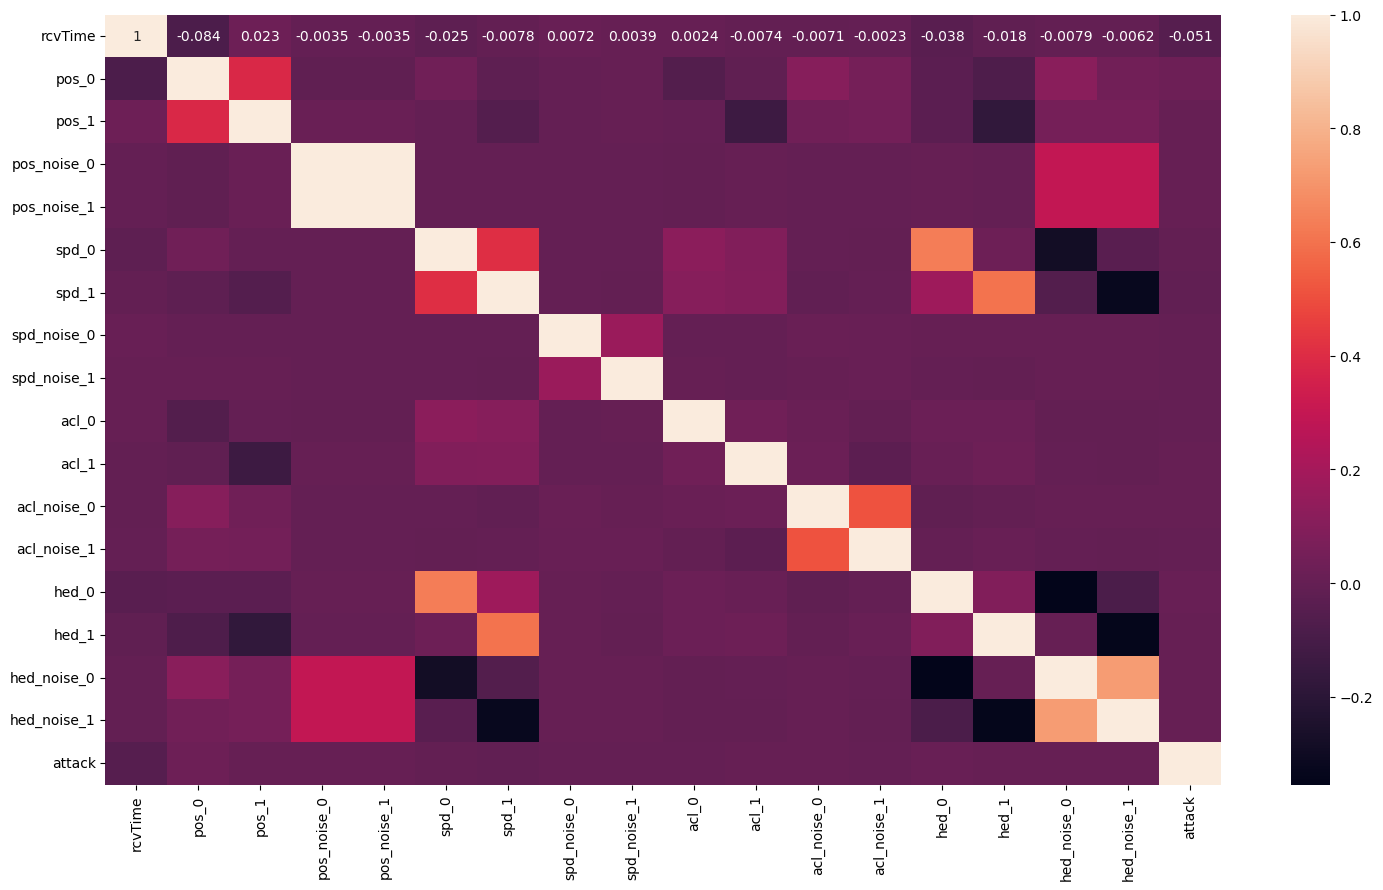

In [11]:
## Check for multicollinearity
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [13]:
#Train Test Split
from sklearn.model_selection import train_test_split
x,y=train_test_split(df,test_size=0.97,random_state=2529)

In [14]:
X=x[['rcvTime', 'pos_0', 'pos_1', 'pos_noise_0',
       'pos_noise_1', 'spd_0', 'spd_1', 'spd_noise_0', 'spd_noise_1', 'acl_0',
       'acl_1', 'acl_noise_0', 'acl_noise_1', 'hed_0', 'hed_1', 'hed_noise_0',
       'hed_noise_1']]
y=x['attack']

In [15]:
X.shape

(30000, 17)

In [16]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=2529,stratify=y)

In [17]:
y_train.value_counts(),y_test.value_counts()

(attack
 0    11595
 1     9405
 Name: count, dtype: int64,
 attack
 0    4969
 1    4031
 Name: count, dtype: int64)

In [18]:
## Feature Selection based on correlaltion
X_train.corr()

,rcvTime,pos_0,pos_1,pos_noise_0,pos_noise_1,spd_0,spd_1,spd_noise_0,spd_noise_1,acl_0,acl_1,acl_noise_0,acl_noise_1,hed_0,hed_1,hed_noise_0,hed_noise_1
rcvTime,1.000000,-0.096902,0.027599,-0.007198,-0.006532,-0.026679,-0.001785,0.013378,-0.003653,0.007141,-0.015865,-0.007956,0.003083,-0.040285,-0.016495,-0.016648,-0.013789
pos_0,-0.096902,1.000000,0.375482,0.067471,0.067605,0.035941,-0.021146,-0.004832,-0.001321,-0.069254,-0.028660,0.094844,0.050212,-0.037667,-0.076637,0.152185,0.069281
pos_1,0.027599,0.375482,1.000000,-0.005330,-0.005271,-0.001982,-0.065707,-0.005699,0.002950,0.004019,-0.141181,0.042930,0.044509,-0.033642,-0.179325,0.015206,0.022505
pos_noise_0,-0.007198,0.067471,-0.005330,1.000000,0.995564,0.004375,-0.001498,-0.000232,0.000308,0.037069,-0.017278,0.006061,0.004799,-0.010685,0.004937,0.678876,0.659204
pos_noise_1,-0.006532,0.067605,-0.005271,0.995564,1.000000,0.003223,-0.002046,0.000123,0.000545,0.036779,-0.018153,0.006926,0.005827,-0.011959,0.004800,0.680183,0.659602
spd_0,-0.026679,0.035941,-0.001982,0.004375,0.003223,1.000000,0.405138,0.007157,0.001059,0.114767,0.091068,-0.000827,-0.007349,0.632987,0.023491,-0.308362,-0.041020
spd_1,-0.001785,-0.021146,-0.065707,-0.001498,-0.002046,0.405138,1.000000,0.001965,-0.010137,0.111574,0.095559,0.002295,0.001531,0.171057,0.602311,-0.059983,-0.346202
spd_noise_0,0.013378,-0.004832,-0.005699,-0.000232,0.000123,0.007157,0.001965,1.000000,0.163771,0.001220,-0.004842,0.008358,0.013372,0.001735,0.003009,-0.000567,0.003028
spd_noise_1,-0.003653,-0.001321,0.002950,0.000308,0.000545,0.001059,-0.010137,0.163771,1.000000,-0.005165,-0.005643,0.023399,0.021364,0.003407,-0.005565,0.000313,0.007472
acl_0,0.007141,-0.069254,0.004019,0.037069,0.036779,0.114767,0.111574,0.001220,-0.005165,1.000000,0.041981,0.003041,-0.025567,-0.001211,0.019643,0.021158,0.015371


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<Axes: >

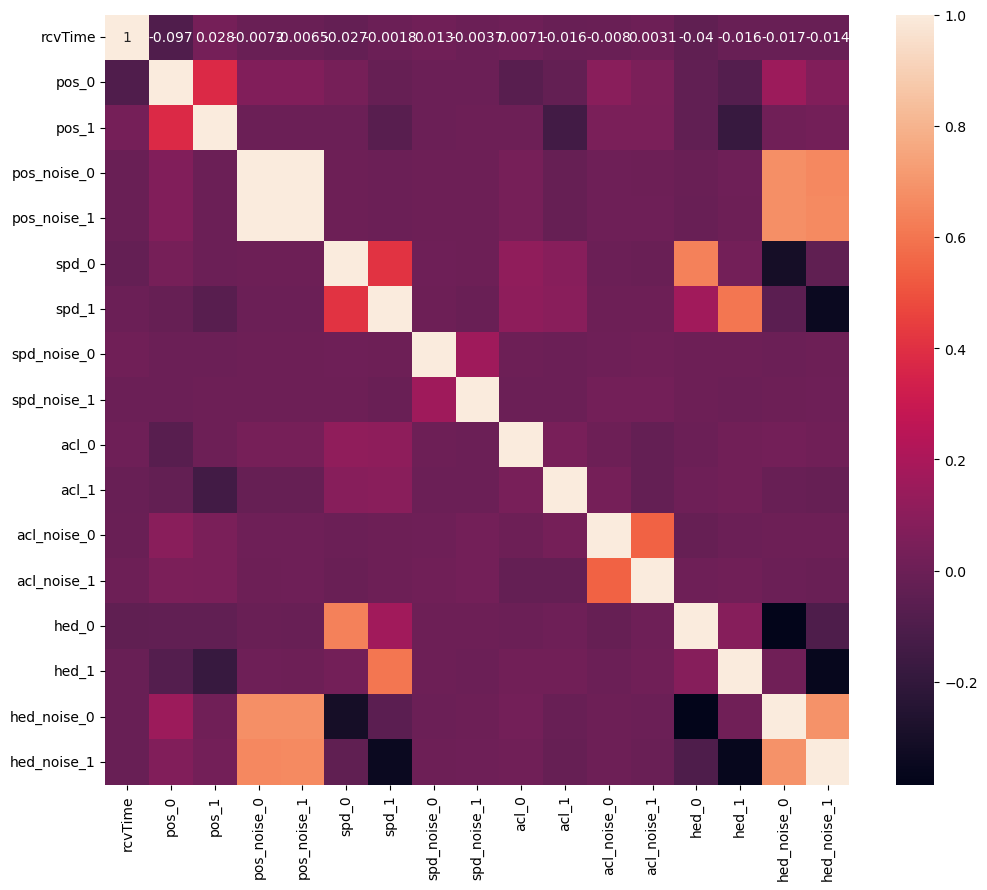

In [20]:
## Check for multicollinearity
plt.figure(figsize=(12,10))

corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [21]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.70)

In [23]:
corr_features

{'pos_noise_1'}

In [24]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((21000, 16), (9000, 16))

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
mm=MinMaxScaler()
X_train_scaled=mm.fit_transform(X_train)
X_test_scaled=mm.transform(X_test)

In [26]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,0.459759,0.191571,0.498654,0.016209,0.422616,0.421889,0.533443,0.479868,0.505314,0.504662,0.013861,0.015349,0.464135,0.518545,0.006895,0.006816
std,0.429032,0.148533,0.115960,0.008529,0.139212,0.149125,0.066353,0.087918,0.105423,0.132113,0.043270,0.040387,0.319581,0.374442,0.010282,0.010553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.066818,0.069725,0.398959,0.014108,0.369012,0.333262,0.519852,0.451511,0.481092,0.478072,0.000073,0.000084,0.169746,0.113418,0.001999,0.001797
50%,0.115880,0.098405,0.520777,0.016143,0.405525,0.394006,0.533218,0.479925,0.499927,0.500008,0.001048,0.000990,0.484900,0.527364,0.004765,0.004166
75%,0.922289,0.324235,0.587264,0.018202,0.468081,0.512067,0.547321,0.507408,0.523546,0.534941,0.007362,0.011251,0.587632,0.926233,0.008829,0.008716
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
pd.DataFrame(X_test_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9.000000e+03,9.000000e+03,9000.000000,9000.000000
mean,0.463394,0.191171,0.496993,0.016291,0.422372,0.422740,0.533494,0.480263,0.504228,0.502939,0.012742,0.015788,4.657364e-01,5.236064e-01,0.006913,0.006668
std,0.429175,0.147333,0.116133,0.010738,0.139454,0.145712,0.066443,0.088263,0.100441,0.132932,0.037866,0.040167,3.222061e-01,3.732578e-01,0.011389,0.011464
min,-0.000159,0.000000,0.106990,0.000000,0.038528,0.067032,0.171823,0.020731,0.000052,0.001091,0.000000,0.000000,3.026861e-09,1.003088e-09,0.000000,0.000000
25%,0.067972,0.070782,0.398798,0.014113,0.370482,0.337010,0.519587,0.452698,0.480882,0.478107,0.000077,0.000078,1.668671e-01,1.294862e-01,0.001932,0.001833
50%,0.117085,0.098637,0.516515,0.016164,0.405525,0.394007,0.533218,0.479925,0.499928,0.500007,0.001061,0.001037,4.831010e-01,5.326403e-01,0.004731,0.004051
75%,0.922285,0.324387,0.587038,0.018162,0.469905,0.512466,0.547784,0.507740,0.522214,0.532946,0.007429,0.012794,6.048216e-01,9.426718e-01,0.008717,0.008552
max,0.998522,0.985874,0.869435,0.887722,0.998203,1.000666,0.910390,1.051801,0.999725,0.998661,0.781048,0.819803,1.000000e+00,1.000000e+00,0.835730,0.834326


Text(0.5, 1.0, 'X_train After Scaling')

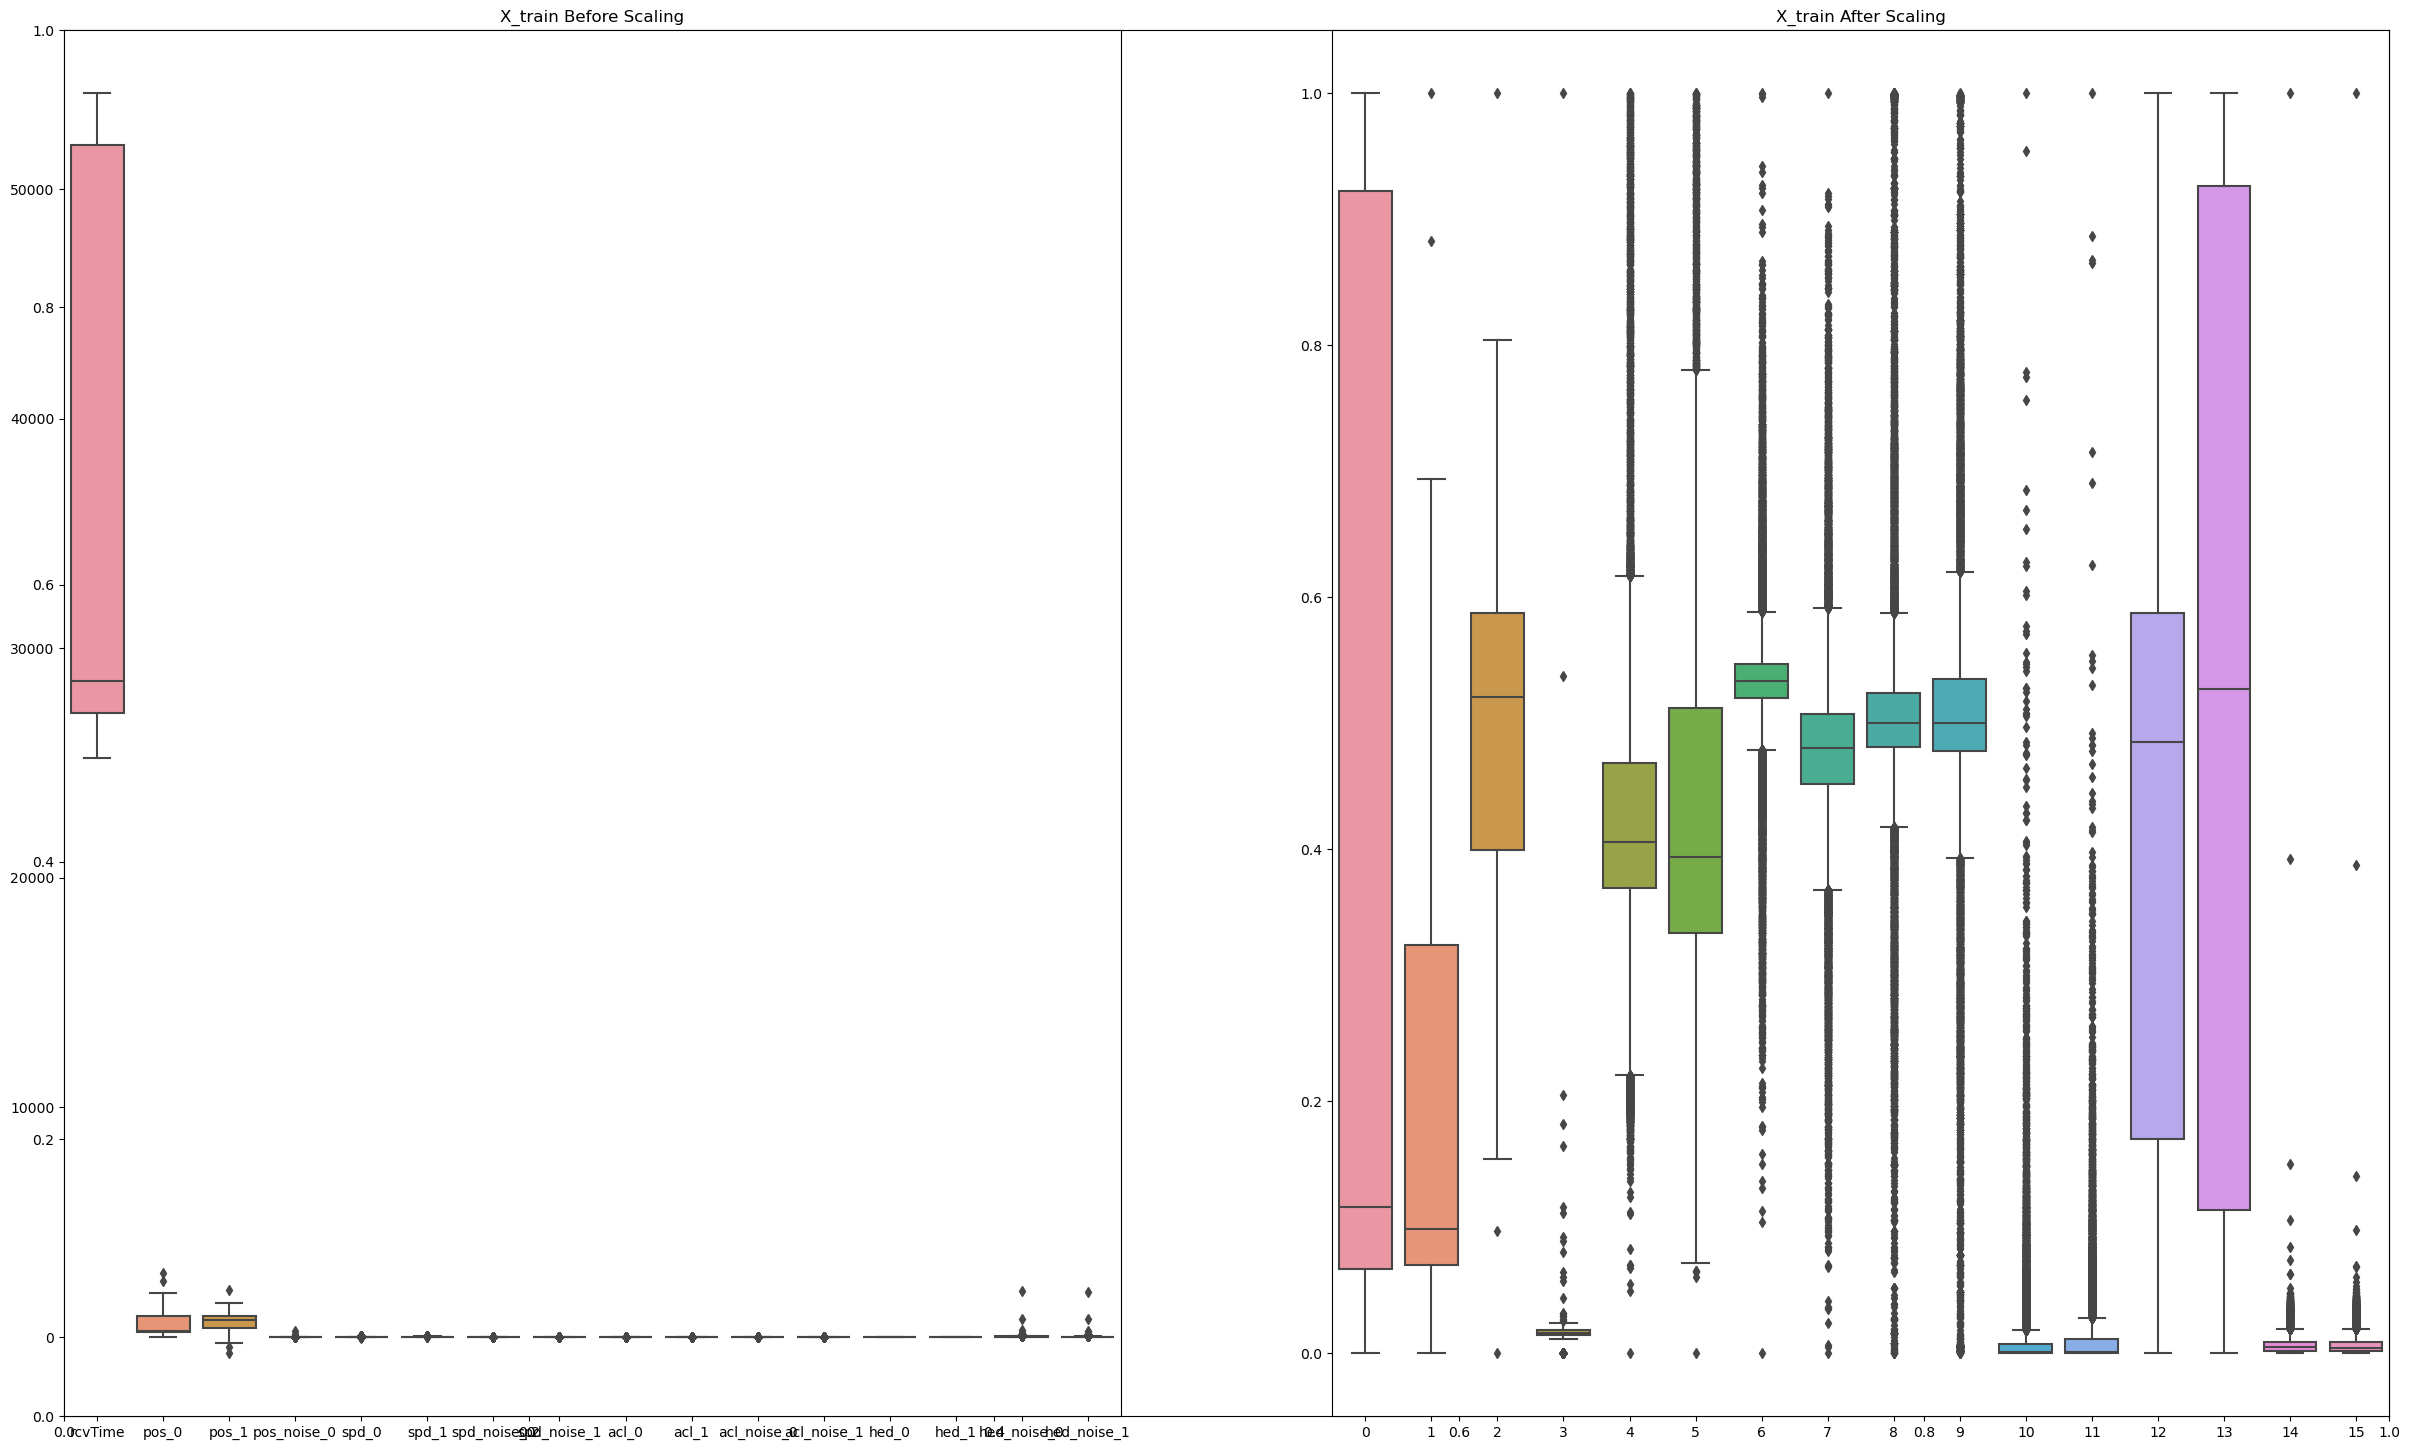

In [28]:
plt.subplots(figsize=(30, 18))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

.


‎ 

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [35]:
# !pip install xgboost

In [36]:
models={
    
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.5518
- F1 score: 0.4128
- Precision: 0.4931
- Recall: 0.0266
- Roc Auc Score: 0.5022
----------------------------------
Model performance for Test set
- Accuracy: 0.5497
- F1 score: 0.4079
- Precision: 0.4433
- Recall: 0.0213
- Roc Auc Score: 0.4998


Decision Tree
Model performance for Training set
- Accuracy: 0.9994
- F1 score: 0.9994
- Precision: 1.0000
- Recall: 0.9986
- Roc Auc Score: 0.9993
----------------------------------
Model performance for Test set
- Accuracy: 0.5223
- F1 score: 0.5228
- Precision: 0.4675
- Recall: 0.4788
- Roc Auc Score: 0.5182


Random Forest
Model performance for Training set
- Accuracy: 0.9994
- F1 score: 0.9994
- Precision: 0.9996
- Recall: 0.9990
- Roc Auc Score: 0.9993
----------------------------------
Model performance for Test set
- Accuracy: 0.5370
- F1 score: 0.5180
- Precision: 0.4746
- Recall: 0.3148
- Roc Auc Score: 0.5160


Gradient Boost
Model performance for Training se

In [38]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

adaboost_param={
    "n_estimators":[50,60,70,80,90],
    "algorithm":['SAMME','SAMME.R']
}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

gradient_params={"loss": ['log_loss','deviance','exponential'],
             "criterion": ['friedman_mse','squared_error','mse'],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500],
              "max_depth": [5, 8, 15, None, 10]
                }

In [39]:
gradient_params

{'loss': ['log_loss', 'deviance', 'exponential'],
 'criterion': ['friedman_mse', 'squared_error', 'mse'],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500],
 'max_depth': [5, 8, 15, None, 10]}

In [40]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("Gradient", GradientBoostingClassifier(), gradient_params)
                   
                   ]

In [41]:
randomcv_models

[('Gradient',
  GradientBoostingClassifier(),
  {'loss': ['log_loss', 'deviance', 'exponential'],
   'criterion': ['friedman_mse', 'squared_error', 'mse'],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500],
   'max_depth': [5, 8, 15, None, 10]})]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train_scaled, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

In [ ]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Xgboost',
    'model':XGBClassifier(n_estimators=200,max_depth=12,learning_rate=0.1,
                           colsample_bytree=1),
    'auc':  0.8882
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train_scaled, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

**K nearest neighbour**

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
classifier=KNeighborsClassifier(n_neighbors=30,algorithm='ball_tree')
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=30)

In [40]:

y_pred_knn=classifier.predict(X_test_scaled)

In [41]:
score=accuracy_score(y_pred_knn,y_test)
print("KNN")
print(score)
print(classification_report(y_pred_knn,y_test))
print(confusion_matrix(y_pred_knn,y_test))

KNN
0.544
              precision    recall  f1-score   support

           0       0.77      0.56      0.65     13475
           1       0.27      0.49      0.35      4525

    accuracy                           0.54     18000
   macro avg       0.52      0.52      0.50     18000
weighted avg       0.64      0.54      0.57     18000

[[7594 5881]
 [2327 2198]]


**Naive bayes**

In [42]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train_scaled,y_train)

GaussianNB()

In [43]:
y_pred_g=gnb.predict(X_test_scaled)

In [44]:
score=accuracy_score(y_pred_g,y_test)
print("Naive bayes")
print(score)
print(classification_report(y_pred_g,y_test))
print(confusion_matrix(y_pred_g,y_test))

Naive bayes
0.4568888888888889
              precision    recall  f1-score   support

           0       0.09      0.55      0.15      1589
           1       0.91      0.45      0.60     16411

    accuracy                           0.46     18000
   macro avg       0.50      0.50      0.38     18000
weighted avg       0.84      0.46      0.56     18000

[[ 867  722]
 [9054 7357]]


SVC

In [45]:
from sklearn.svm import SVC

svc=SVC(kernel='linear')
svc.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [46]:
y_pred1=svc.predict(X_test_scaled)

In [47]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score=accuracy_score(y_pred1,y_test)
print("SVC")
print(score)
print(classification_report(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))

SVC
0.5511666666666667
              precision    recall  f1-score   support

           0       1.00      0.55      0.71     18000
           1       0.00      0.00      0.00         0

    accuracy                           0.55     18000
   macro avg       0.50      0.28      0.36     18000
weighted avg       1.00      0.55      0.71     18000

[[9921 8079]
 [   0    0]]


rbf krrnal

In [48]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train_scaled,y_train)

SVC()

In [49]:
y_pred2=svc.predict(X_test_scaled)


In [50]:
print(classification_report(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71     18000
           1       0.00      0.00      0.00         0

    accuracy                           0.55     18000
   macro avg       0.50      0.28      0.36     18000
weighted avg       1.00      0.55      0.71     18000

[[9921 8079]
 [   0    0]]


Polynomial kernal

In [51]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train_scaled,y_train)



SVC(kernel='poly')

In [52]:
## Prediction
y_pred3=polynomial.predict(X_test_scaled)

In [53]:
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.55      0.98      0.71      9921
           1       0.43      0.02      0.03      8079

    accuracy                           0.55     18000
   macro avg       0.49      0.50      0.37     18000
weighted avg       0.50      0.55      0.40     18000

[[9725  196]
 [7932  147]]


Sigmoid

In [54]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train_scaled,y_train)


SVC(kernel='sigmoid')

In [55]:
## Prediction
y_pred3=sigmoid.predict(X_test_scaled)

In [56]:
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      9921
           1       0.45      0.45      0.45      8079

    accuracy                           0.51     18000
   macro avg       0.50      0.50      0.50     18000
weighted avg       0.51      0.51      0.51     18000

[[5493 4428]
 [4431 3648]]


Hyperparameter tuning svm

In [57]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [58]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=2,verbose=3)

In [59]:
# randomcv=RandomizedSearchCV(SVC(),param_grid=param_grid,refit=True,cv=2,verbose=3)
randomcv=RandomizedSearchCV(estimator=SVC(),param_distributions=param_grid,cv=2)

In [60]:
randomcv.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=2, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']})

In [61]:
## Prediction
y_pred4=randomcv.predict(X_test_scaled)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      9921
           1       0.00      0.00      0.00      8079

    accuracy                           0.55     18000
   macro avg       0.28      0.50      0.36     18000
weighted avg       0.30      0.55      0.39     18000

[[9921    0]
 [8079    0]]


In [62]:
grid.fit(X_train_scaled,y_train)

Fitting 2 folds for each of 25 candidates, totalling 50 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=  54.3s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=  54.6s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.551 total time=  43.4s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.551 total time=  43.6s
[CV 1/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.551 total time=  42.3s
[CV 2/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.551 total time=  42.6s
[CV 1/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.551 total time=  39.8s
[CV 2/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.551 total time=  40.3s
[CV 1/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.551 total time=  39.4s
[CV 2/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.551 total time=  39.4s
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.539 total time= 1.2min
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [63]:
grid.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

In [64]:
## Prediction
y_pred5=grid.predict(X_test_scaled)
print(classification_report(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      9921
           1       0.00      0.00      0.00      8079

    accuracy                           0.55     18000
   macro avg       0.28      0.50      0.36     18000
weighted avg       0.30      0.55      0.39     18000

[[9921    0]
 [8079    0]]
